<a href="https://colab.research.google.com/github/janhavijaygade/Prediction-using-linear-regression-The-Sparks-Foundation-internship-task/blob/main/Sparks_foundation_internship_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing dataset

In [ ]:
path_to_dataset =  "http://bit.ly/w-data"
data = pd.read_csv(path_to_dataset)
print("Dataset imported")

Dataset imported


In [ ]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##### First five rows

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


##### Last five rows

In [ ]:
data.tail()


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### Summary of dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Data visualization

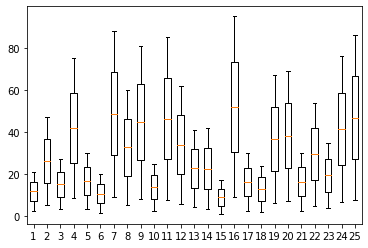

In [ ]:
plt.boxplot(data)
plt.show()

The scatter plot below represents the relationship between the hours you study and the scores you get

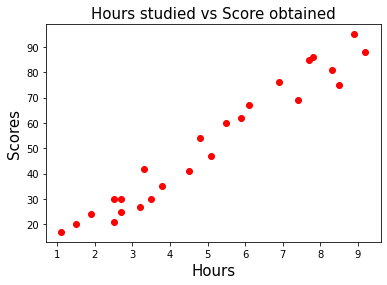

In [ ]:
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score obtained', fontsize=15)
plt.scatter(data.Hours,data.Scores,color='red')
plt.show()

In [ ]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

In [ ]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

### Splitting data into training and testing sets in 80:20 ratio

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)

In [ ]:
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


### Training the data

In [ ]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [ ]:
linreg.fit(X_train,Y_train)
print("Algorithm finished on training data")

Algorithm finished on training data


In [ ]:
print("B0 (Intercept) =",linreg.intercept_,"\nB1 (Slope of line) =",linreg.coef_)

B0 (Intercept) = 2.018160041434662 
B1 (Slope of line) = [9.91065648]


In [ ]:
Y0 = linreg.intercept_ + linreg.coef_*X_train

##### Plotting the training data

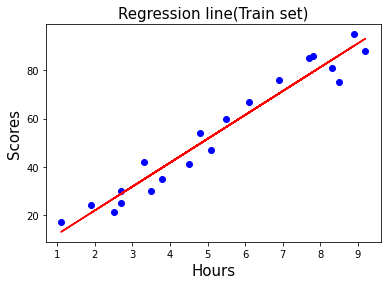

In [ ]:
plt.scatter(X_train,Y_train,color='blue')
plt.plot(X_train,Y0,color='red')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=15)
plt.show()

### Testing the data

In [ ]:
Y_pred=linreg.predict(X_test)
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [ ]:
Y_test

array([20, 27, 69, 30, 62])

##### Plotting the test data

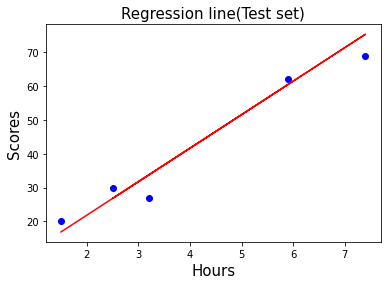

In [ ]:
plt.plot(X_test,Y_pred,color='red')
plt.scatter(X_test,Y_test,color='blue')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=15)
plt.show()

### Comparision of Actual scores with predicted scores

In [ ]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Prediction':prediction})
df_compare

,Actual,Prediction
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Calculating the accuracy of the model

In [ ]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.9454906892105354

### Prediction of errors in the model

In [ ]:

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  21.598769307217456
Root Mean Squared Error =  4.647447612100373
Mean Absolute Error     =  4.647447612100373


### Question - What will be the predicted score if a student studies for 9.25 hrs/ day?

### Answer -

In [ ]:
Prediction_score = linreg.predict([[9.25]])
print("Predicted score if a student studies for 9.25 hrs/ day :",Prediction_score)

Predicted score if a student studies for 9.25 hrs/ day : [93.69173249]
